In [1]:
#pip install docx2txt

In [28]:
import docx2txt
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
resume = docx2txt.process("D://AI_ML//Projects//Resume//Resume1.docx")

In [5]:
job_description = docx2txt.process("D://AI_ML//Projects//Resume/Job_Desc.docx")

In [6]:
#job_description

In [7]:
text = [resume, job_description]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer()

In [11]:
count_matrix = cv.fit_transform(text)

In [12]:
count_matrix

<2x468 sparse matrix of type '<class 'numpy.int64'>'
	with 519 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
match_percentage  = cosine_similarity(count_matrix)[0][1]*100

In [15]:
match_percentage  = round(match_percentage, 2)


In [16]:
print(" This Resume Matches " + str(match_percentage) + " of the Job Description")

 This Resume Matches 56.76 of the Job Description


***************************************************************

***
**Same code from above which Loops through Folder and score all Resumes**
***

***************************************************************

In [17]:

import os

In [21]:
resume_score = {}

for filename in os.listdir("D:\\AI_ML\\Projects\\Resume\\resumes"):
    resume_data = docx2txt.process(filename)
    stich_job_resume = [resume_data, job_description]
    ct_matrix = cv.fit_transform(stich_job_resume)
    score = cosine_similarity(ct_matrix)[0][1]
    resume_score[filename] = round(score,2)
    print(" The Resume " + filename + " scores " + str(round(score,2)) + " Agaisnt Job Description")

 The Resume Job_Desc.docx scores 1.0 Agaisnt Job Description
 The Resume Maria Lisa.docx scores 0.57 Agaisnt Job Description
 The Resume MARIA_LISA.docx scores 0.57 Agaisnt Job Description
 The Resume Resume_2.docx scores 0.58 Agaisnt Job Description


In [25]:
resume_score_df = pd.DataFrame(resume_score.items(), columns= ['Resume', 'Score'])

In [26]:
resume_score_df.head()

,Resume,Score
0,Job_Desc.docx,1.00
1,Maria Lisa.docx,0.57
2,MARIA_LISA.docx,0.57
3,Resume_2.docx,0.58


[]

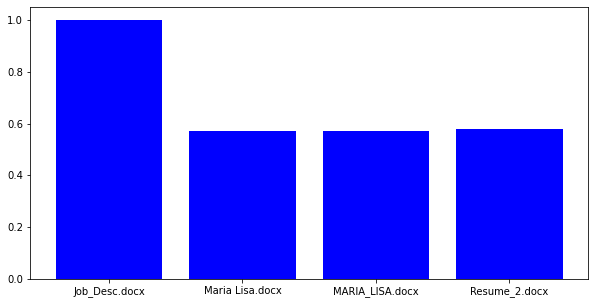

In [30]:
plt.figure(figsize = [10,5])
plt.bar(resume_score_df['Resume'],resume_score_df['Score'], color = "blue")
plt.title("Resumes Score For Job Description")
plt.xlabel("Resumes")
plt.ylabel("Score")
plt.plot()